In [6]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 2.2MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [8]:
!pip install python-dateutil

In [4]:
!pip install missingno

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 24kB/s  eta 0:00:01    |█████████▏                      | 4.2MB 5.6MB/s eta 0:00:02     |███████████████████████████     | 12.5MB 2.7MB/s eta 0:00:01     |█████████████████████████████▎  | 13.5MB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 21kB/s  eta 0:00:01    |█▊                              | 573kB 1.1MB/s eta 0:00:10
     |████████████████████████████████| 1.8MB 5.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl
import missingno as msn
import seaborn as sns
import datetime
from datetime import timedelta
%matplotlib inline


In [8]:
df = pd.read_csv('flightdatadump - flightdatadump.csv')

In [9]:
df.columns
len(df.columns)

12

In [45]:
df.head(5)

hex_ident  altitude(feet)  latitude  longitude        date      time  \
0    40631C           14525  53.65947   -1.43819  2017/09/11  17:02:06   
1    40631C           14525  53.65956   -1.43921  2017/09/11  17:02:07   
2    40631C           14500  53.65979   -1.44066  2017/09/11  17:02:07   
3    40631C           14475  53.66025   -1.44447  2017/09/11  17:02:09   
4    40631C           14475  53.66044   -1.44591  2017/09/11  17:02:10   

    angle  distance(nauticalmile)  squawk  ground_speed(knotph)  track  \
0 -120.77                   11.27    6276                   299    283   
1 -120.64                   11.30    6276                   299    283   
2 -120.43                   11.32    6276                   299    283   
3 -119.94                   11.40    6276                   299    283   
4 -119.75                   11.43    6276                   299    283   

  callsign  
0      NaN  
1      NaN  
2  EZY63BT  
3  EZY63BT  
4  EZY63BT

In [46]:
df.tail(5)

hex_ident  altitude(feet)  latitude  longitude        date      time  \
1956    400B26           12650  53.69756   -1.53275  2017/09/11  17:13:17   
1957    400B26           12650  53.69756   -1.53275  2017/09/11  17:13:17   
1958    400B26           12650  53.69756   -1.53275  2017/09/11  17:13:17   
1959    400B26           12650  53.69756   -1.53275  2017/09/11  17:13:17   
1960    400B26           12650  53.69756   -1.53275  2017/09/11  17:13:17   

       angle  distance(nauticalmile)  squawk  ground_speed(knotph)  track  \
1956 -106.59                   12.74    3472                   343    144   
1957 -106.59                   12.74    3472                   343    144   
1958 -106.59                   12.74    3472                   343    144   
1959 -106.59                   12.74    3472                   343    144   
1960 -106.59                   12.74    3472                   343    144   

     callsign  
1956  EXS2176  
1957  EXS2177  
1958  EXS2178  
1959  EXS2179  
1960  EXS2180

In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 12 columns):
hex_ident                 1961 non-null object
altitude(feet)            1961 non-null int64
latitude                  1961 non-null float64
longitude                 1961 non-null float64
date                      1961 non-null object
time                      1961 non-null object
angle                     1961 non-null float64
distance(nauticalmile)    1961 non-null float64
squawk                    1961 non-null int64
ground_speed(knotph)      1961 non-null int64
track                     1961 non-null int64
callsign                  1959 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 183.9+ KB


altitude(feet)     latitude    longitude        angle  \
count     1961.000000  1961.000000  1961.000000  1961.000000   
mean     12753.862825    53.695387    -1.528902  -107.232606   
std        395.252512     0.008267     0.014840     2.460234   
min      12650.000000    53.659470    -1.532750  -120.770000   
25%      12650.000000    53.697560    -1.532750  -106.590000   
50%      12650.000000    53.697560    -1.532750  -106.590000   
75%      12650.000000    53.697560    -1.532750  -106.590000   
max      14525.000000    53.697560    -1.438190  -106.590000   

       distance(nauticalmile)       squawk  ground_speed(knotph)        track  
count             1961.000000  1961.000000           1961.000000  1961.000000  
mean                12.694447  3653.595105            340.150433   153.002040  
std                  0.181703   690.259993             10.831469    34.217596  
min                 11.270000  3472.000000            299.000000   144.000000  
25%                 12.740000  3472.000000            343.000000   144.000000  
50%                 12.740000  3472.000000            343.000000   144.000000  
75%                 12.740000  3472.000000            343.000000   144.000000  
max                 12.740000  6276.000000            343.000000   283.000000

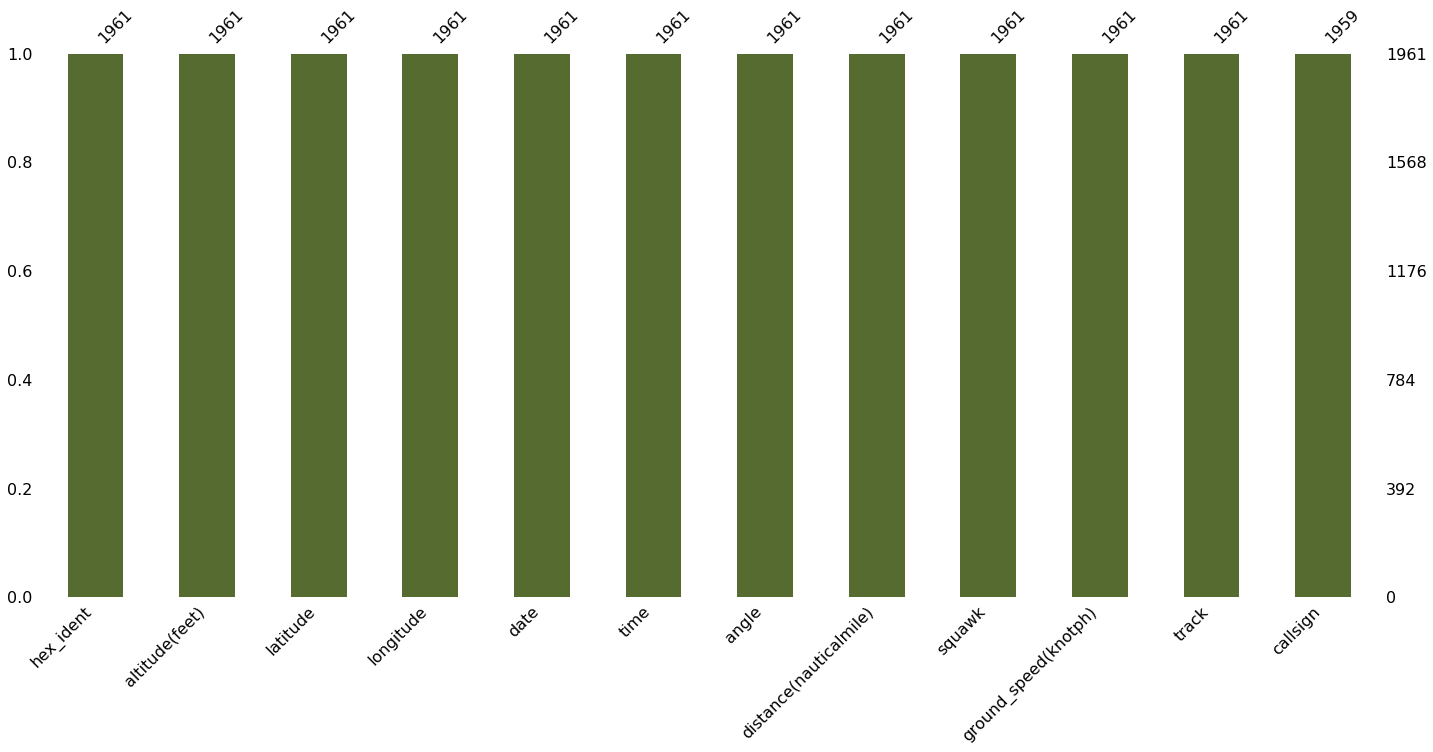

In [11]:
# Notice you can always adjust the color of the visualization
msn.bar(df, color='darkolivegreen');

In [21]:
# Add "-" in front of the number to correctly plot the data:
df['longitude'] = 0 - df['longitude']
df.head()

hex_ident  altitude(feet)  latitude  longitude        date      time  \
0    40631C           14525  53.65947   -1.43819  2017/09/11  17:02:06   
1    40631C           14525  53.65956   -1.43921  2017/09/11  17:02:07   
2    40631C           14500  53.65979   -1.44066  2017/09/11  17:02:07   
3    40631C           14475  53.66025   -1.44447  2017/09/11  17:02:09   
4    40631C           14475  53.66044   -1.44591  2017/09/11  17:02:10   

    angle  distance(nauticalmile)  squawk  ground_speed(knotph)  track  \
0 -120.77                   11.27    6276                   299    283   
1 -120.64                   11.30    6276                   299    283   
2 -120.43                   11.32    6276                   299    283   
3 -119.94                   11.40    6276                   299    283   
4 -119.75                   11.43    6276                   299    283   

  callsign               coordinates  
0      NaN  POINT (1.43819 53.65947)  
1      NaN  POINT (1.43921 53.65956)  
2  EZY63BT  POINT (1.44066 53.65979)  
3  EZY63BT  POINT (1.44447 53.66025)  
4  EZY63BT  POINT (1.44591 53.66044)

In [23]:
# Combining Lattitude and Longitude to create hurricane coordinates:
df['coordinates'] = df[['longitude', 'latitude']].values.tolist()
df.head()

hex_ident  altitude(feet)  latitude  longitude        date      time  \
0    40631C           14525  53.65947   -1.43819  2017/09/11  17:02:06   
1    40631C           14525  53.65956   -1.43921  2017/09/11  17:02:07   
2    40631C           14500  53.65979   -1.44066  2017/09/11  17:02:07   
3    40631C           14475  53.66025   -1.44447  2017/09/11  17:02:09   
4    40631C           14475  53.66044   -1.44591  2017/09/11  17:02:10   

    angle  distance(nauticalmile)  squawk  ground_speed(knotph)  track  \
0 -120.77                   11.27    6276                   299    283   
1 -120.64                   11.30    6276                   299    283   
2 -120.43                   11.32    6276                   299    283   
3 -119.94                   11.40    6276                   299    283   
4 -119.75                   11.43    6276                   299    283   

  callsign                      coordinates  
0      NaN  [-1.4381899999999999, 53.65947]  
1      NaN             [-1.43921, 53.65956]  
2  EZY63BT             [-1.44066, 53.65979]  
3  EZY63BT  [-1.4444700000000001, 53.66025]  
4  EZY63BT             [-1.44591, 53.66044]

In [24]:
# Change the coordinates to a geoPoint
df['coordinates'] = df['coordinates'].apply(Point)
df.head()

hex_ident  altitude(feet)  latitude  longitude        date      time  \
0    40631C           14525  53.65947   -1.43819  2017/09/11  17:02:06   
1    40631C           14525  53.65956   -1.43921  2017/09/11  17:02:07   
2    40631C           14500  53.65979   -1.44066  2017/09/11  17:02:07   
3    40631C           14475  53.66025   -1.44447  2017/09/11  17:02:09   
4    40631C           14475  53.66044   -1.44591  2017/09/11  17:02:10   

    angle  distance(nauticalmile)  squawk  ground_speed(knotph)  track  \
0 -120.77                   11.27    6276                   299    283   
1 -120.64                   11.30    6276                   299    283   
2 -120.43                   11.32    6276                   299    283   
3 -119.94                   11.40    6276                   299    283   
4 -119.75                   11.43    6276                   299    283   

  callsign                coordinates  
0      NaN  POINT (-1.43819 53.65947)  
1      NaN  POINT (-1.43921 53.65956)  
2  EZY63BT  POINT (-1.44066 53.65979)  
3  EZY63BT  POINT (-1.44447 53.66025)  
4  EZY63BT  POINT (-1.44591 53.66044)

In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
pd.core.frame.DataFrame

pandas.core.frame.DataFrame

In [27]:
type(df['coordinates'])
pd.core.series.Series
df = geopandas.GeoDataFrame(df, geometry= 'coordinates')
df.head()

hex_ident  altitude(feet)  latitude  longitude        date      time  \
0    40631C           14525  53.65947   -1.43819  2017/09/11  17:02:06   
1    40631C           14525  53.65956   -1.43921  2017/09/11  17:02:07   
2    40631C           14500  53.65979   -1.44066  2017/09/11  17:02:07   
3    40631C           14475  53.66025   -1.44447  2017/09/11  17:02:09   
4    40631C           14475  53.66044   -1.44591  2017/09/11  17:02:10   

    angle  distance(nauticalmile)  squawk  ground_speed(knotph)  track  \
0 -120.77                   11.27    6276                   299    283   
1 -120.64                   11.30    6276                   299    283   
2 -120.43                   11.32    6276                   299    283   
3 -119.94                   11.40    6276                   299    283   
4 -119.75                   11.43    6276                   299    283   

  callsign                coordinates  
0      NaN  POINT (-1.43819 53.65947)  
1      NaN  POINT (-1.43921 53.65956)  
2  EZY63BT  POINT (-1.44066 53.65979)  
3  EZY63BT  POINT (-1.44447 53.66025)  
4  EZY63BT  POINT (-1.44591 53.66044)

In [28]:
type(df)
geopandas.geodataframe.GeoDataFrame
type(df['coordinates'])
geopandas.geoseries.GeoSeries

geopandas.geoseries.GeoSeries

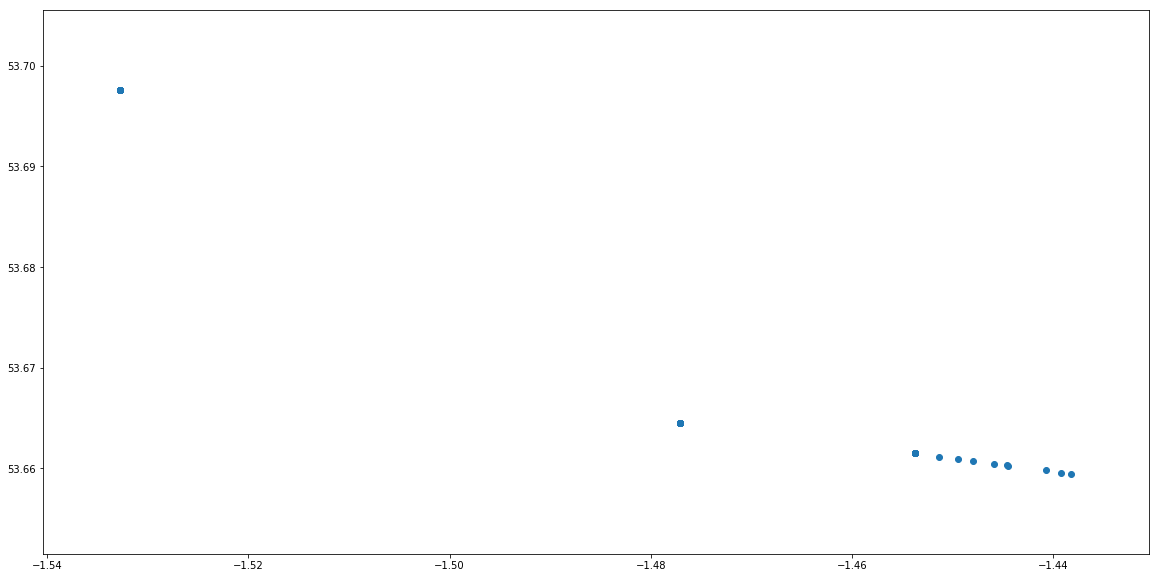

In [29]:
df.plot(figsize=(20,10));

In [ ]:
#import datetime
from datetime import timedelta

# create timedelta object with difference of 2 weeks
d = timedelta(weeks=2)

print(d)
print(type(d))
print(d.days)

In [61]:
import csv
from matplotlib import pyplot as plt
filename = 'flightdatadump - flightdatadump.csv'
#Plot Data
fig = plt.figure(dpi = 128, figsize = (10,6))
plt.plot(highs, c = 'red')

#Format Plot
plt.title("Flightpath", fontsize = 24)
plt.xlabel('time',fontsize = 16)
plt.ylabel("altitude(feet)", fontsize = 16)
plt.tick_params(axis = 'both', which = 'major' , labelsize = 16)
plt.show()

Text(0.5, 0, 'altitude(feet)')

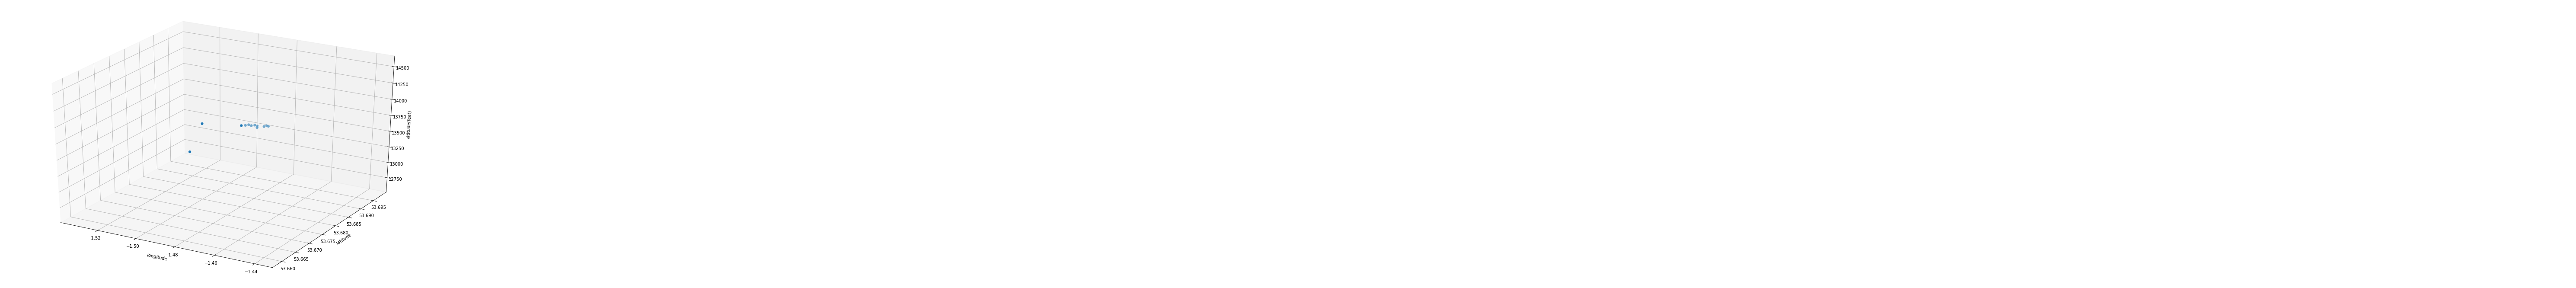

In [54]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

xs = df['longitude']
ys = df['latitude']
zs = df['altitude(feet)']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('altitude(feet)')